<a href="https://colab.research.google.com/github/adnanhilal/H.W2/blob/master/Hilal_malaria_cell_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Download and Prepare  

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np 
import pandas as pd 
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from sklearn.model_selection import train_test_split


In [0]:
!pip install -q kaggle

In [3]:
import json
import zipfile
import os
!mkdir -p /root/.kaggle

api_token =  {"username":"adnanyhilal",
              "key":"8a8a07fd4078faeb85ead0d3bf10abbf"}

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json
!kaggle config set -n path -v /root/.kaggle

- path is now set to: /root/.kaggle


In [4]:
!kaggle datasets download iarunava/cell-images-for-detecting-malaria

 96% 325M/337M [00:03<00:00, 127MB/s]
100% 337M/337M [00:03<00:00, 109MB/s]


In [5]:
!unzip /root/.kaggle/datasets/iarunava/cell-images-for-detecting-malaria/cell-images-for-detecting-malaria.zip

Archive:  /root/.kaggle/datasets/iarunava/cell-images-for-detecting-malaria/cell-images-for-detecting-malaria.zip
   creating: cell_images/
   creating: cell_images/Parasitized/
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_201

In [0]:
infected = os.listdir('./cell_images/Parasitized/') 
uninfected = os.listdir('./cell_images/Uninfected')

In [7]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("./cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        data.append(np.array(resize_img))
        labels.append(1)
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("./cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        data.append(np.array(resize_img))
        labels.append(0)
        
    except AttributeError:
        print('')

In [0]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

In [9]:
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (27558, 50, 50, 3) | labels : (27558,)


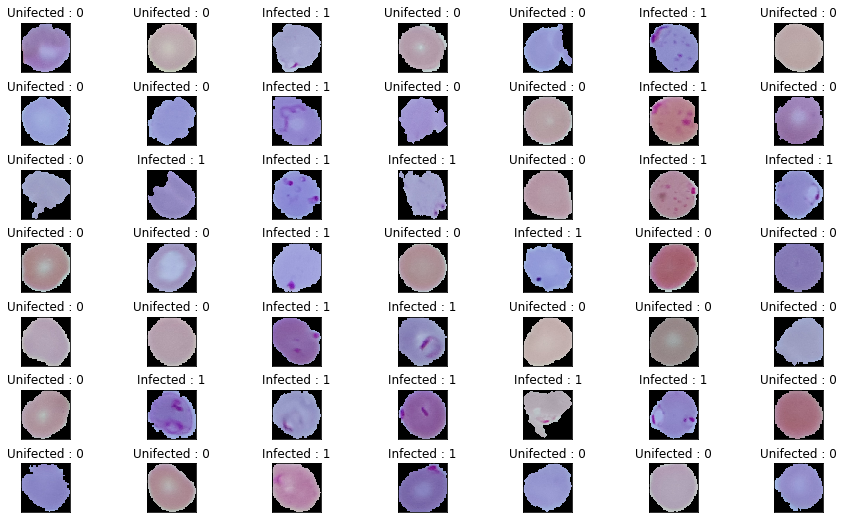

In [10]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [0]:
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

In [0]:
cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells/255

In [0]:
X_train, X_test, y_train, y_test = train_test_split(cells, labels, test_size = 0.3, random_state=50)

In [14]:
 from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
nb_classes = 2 

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [17]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", y_train.shape)

Training matrix shape (19290, 50, 50, 3)
Testing matrix shape (19290, 2)


# Convolutional Neural Network

In [0]:
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization, Activation 
from keras.models import Sequential
from keras import backend as K
from keras import optimizers

In [0]:
import numpy as np                  
import matplotlib.pyplot as plt      
import random                       

from keras.datasets import mnist    
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils

In [0]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(16, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))


    model.add(Conv2D(16, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(32, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'sigmoid'))
    
    return model

In [21]:
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxP

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs = 15, batch_size = 25, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 15432 samples, validate on 3858 samples
Epoch 1/15
15432/15432 [==============================] - 52s 3ms/step - loss: 0.6015 - acc: 0.6857 - val_loss: 1.9729 - val_acc: 0.5127
Epoch 2/15
15432/15432 [==============================] - 51s 3ms/step - loss: 0.3149 - acc: 0.8838 - val_loss: 0.2103 - val_acc: 0.9269
Epoch 3/15
15432/15432 [==============================] - 51s 3ms/step - loss: 0.2253 - acc: 0.9266 - val_loss: 0.2021 - val_acc: 0.9362
Epoch 4/15
15432/15432 [==============================] - 51s 3ms/step - loss: 0.1949 - acc: 0.9324 - val_loss: 0.2194 - val_acc: 0.9184
Epoch 5/15
15432/15432 [==============================] - 51s 3ms/step - loss: 0.1863 - acc: 0.9366 - val_loss: 0.1965 - val_acc: 0.9251
Epoch 6/15
15432/15432 [==============================] - 50s 3ms/step - loss: 0.1760 - acc: 0.9395 - val_loss: 0.2073 - val_acc: 0.9266
Epoch 7/15
15432/15432 [==============================] - 50s 3ms/step - loss: 0.

In [25]:
accuracy = model.evaluate(X_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

8268/8268 [==============================] - 9s 1ms/step

 Test_Accuracy:- 0.9499274310595065


# Transfer Learning  VGG16

In [26]:
from keras.applications import VGG16
 
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(50, 50, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
vgg_conv.trainable = False

In [0]:
from keras import layers
from keras.models import Sequential

Model1= Sequential()
Model1.add(vgg_conv)
Model1.add(layers.Flatten())
Model1.add(layers.Dense(32,activation='relu'))
Model1.add(layers.Dense(2,activation='sigmoid'))

In [29]:
Model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 14,731,170
Trainable params: 16,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [30]:
y_train.shape

(19290, 2)

In [0]:
Model1.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [32]:
Model1.trainable_weights

[<tf.Variable 'dense_3/kernel:0' shape=(512, 32) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'dense_4/kernel:0' shape=(32, 2) dtype=float32_ref>,
 <tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32_ref>]

In [33]:
history = Model1.fit(X_train, y_train, epochs = 5, batch_size = 25, validation_split=0.2)

Train on 15432 samples, validate on 3858 samples
Epoch 1/5
15432/15432 [==============================] - 493s 32ms/step - loss: 0.6621 - acc: 0.6382 - val_loss: 0.6346 - val_acc: 0.6938
Epoch 2/5
15432/15432 [==============================] - 492s 32ms/step - loss: 0.6189 - acc: 0.7013 - val_loss: 0.6002 - val_acc: 0.7175
Epoch 3/5
15432/15432 [==============================] - 492s 32ms/step - loss: 0.5877 - acc: 0.7221 - val_loss: 0.5696 - val_acc: 0.7414
Epoch 4/5
15432/15432 [==============================] - 493s 32ms/step - loss: 0.5584 - acc: 0.7435 - val_loss: 0.5421 - val_acc: 0.7583
Epoch 5/5
15432/15432 [==============================] - 492s 32ms/step - loss: 0.5340 - acc: 0.7587 - val_loss: 0.5194 - val_acc: 0.7679


In [35]:
accuracy = Model1.evaluate(X_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

8268/8268 [==============================] - 210s 25ms/step

 Test_Accuracy:- 0.767295597513113
